# PA 4: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID: Pooja Gaurav 1001415194                    <-------only this student will upload the assignment


Team member name and ID: Neha Piraji Mali 1001733478

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * fruits.csv
    * Apriori algorithm


Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Groceries' dataset [01],
* and the Apriori Algorithm [02] (You can use the algorithm provided as reference)

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Import your Libraries

import numpy as np
import pandas as pd

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'Groceries_dataset.csv' to look like the fruits.csv.  Each transaction is at one line with a variable length.  Discard the date attribute from your dataset.  

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the fruits.csv


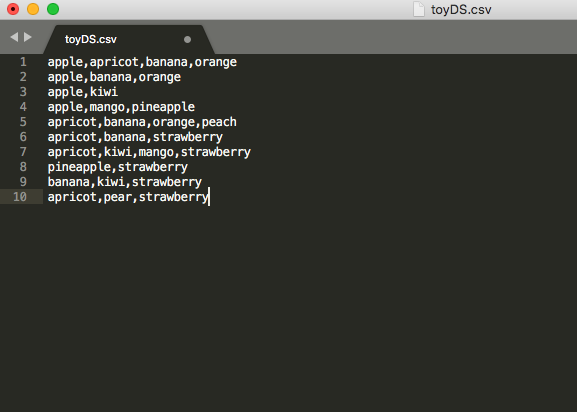

In [5]:
from IPython.display import Image
print ('ScreenShot of the fruits.csv')
Image("SampleScreen01.png")

In [6]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #

# Read CSV file in transaction_data variable
transaction_data=pd.read_csv("Groceries_dataset.csv",names=['Date','Member_number','itemDescription'])

# Seperating each item with a comma
transaction_data['itemDescription'] = transaction_data['itemDescription']+','

# Droping dulplicate values 
trans_data=transaction_data.drop_duplicates()

# Combining data on basis of member number
trans_data=trans_data.groupby(['Member_number']).sum()
# Removing date column
trans_data.drop('Date',axis=1)
trans_data=trans_data['itemDescription'].str.split(',').values.tolist() # Converted data in to list format

In [7]:
# # #  Solution  # # #

# Saving the list in a csv file
data=pd.DataFrame(trans_data)
export_dataset=data.to_csv('dataset.csv',sep=',',header=True,index=None,quoting=None)
data1=pd.read_csv('dataset.csv')
data1.head(7)



,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,cleaner,sausage,tropical fruit,whole milk,citrus fruit,onions,other vegetables,berries,hamburger meat,hamburger meat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,canned beer,frozen meals,butter,ham,citrus fruit,tropical fruit,dessert,whole milk,tropical fruit,frankfurter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,other vegetables,pip fruit,frankfurter,sugar,other vegetables,frozen vegetables,beef,waffles,beef,meat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,canned beer,bottled water,soda,whole milk,other vegetables,whole milk,canned beer,pip fruit,tropical fruit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,meat,sugar,sausage,bottled beer,whole milk,other vegetables,root vegetables,fruit/vegetable juice,soda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bottled water,tropical fruit,whole milk,brown bread,citrus fruit,tropical fruit,beef,coffee,whole milk,beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,frankfurter,frankfurter,pastry,salty snack,bottled beer,male cosmetics,margarine,cat food,rolls/buns,rolls/buns,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2: Implement apriory algorithm and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results.
(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [8]:
import apriori
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 

#Reading csv file by using Apriori function - dataFromFile
data_ap1= apriori.dataFromFile('dataset.csv')


# Generating rules using minimum support and confidence value
data_list, rules= apriori.runApriori(data_ap1, 0.80, 0.90)
print ('Case 1 (minimum support=0.8 and minimum confidence=0.9)')
print ('Case 1 Reasoning: \n If the values of the minimum support_count and confidence is high, there are less patterns and the algorithm runs faster in terms of time.\n\nEventhough there are less patterns because of high minimum confidence and support_count, but the algorithm may not run faster because many algorithms do not use minconfidence to prune the search space.\n\nHigh values of both the arguments in case 1 limits the number of frequent itemset returned and produce very few rules with very high confidence.\n\nAccording to the rules, if a person buys rolls/buns, whole milk or other vegetables individually there is approximately 96 % probability that he will buy vegetables.\n')
print ('Case 1 Output:')
apriori.printResults(data_list, rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.8 and minimum confidence=0.9)
Case 1 Reasoning: 
 If the values of the minimum support_count and confidence is high, there are less patterns and the algorithm runs faster in terms of time.

Eventhough there are less patterns because of high minimum confidence and support_count, but the algorithm may not run faster because many 
algorithms do not use minconfidence to prune the search space.

High values of both the arguments in case 1 limits the number of frequent itemset returned and produce very few rules with very high confidence.

We can conclude that vegetables have been bought very frequently in the given dataset. According to the rules, if a person buys rolls/buns, whole milk or other vegetables individually there is approximately 96 % probability that he will buy vegetables.
Case 1 Output:
item: ('rolls/buns', 'other vegetables') , 0.814
item: ('whole milk', 'soda') , 0.815
item: ('yogurt',) ,

In [14]:

print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
import apriori

data_case1=apriori.dataFromFile('dataset.csv')

## Generating rules using minimum support and confidence value
data_list,rules=apriori.runApriori(data_case1,0.6,0.80)
print ('Case 1 (minimum support=0.6 and minimum confidence=0.80)')
print ('Case 1 Reasoning:\n If the values of the minimum support_count and confidence is high, there are less patterns and the algorithm runs faster in terms of time.\n\nEventhough there are less patterns because of high minimum confidence and support_count, but the algorithm may not run faster because many algorithms do not use minconfidence to prune the search space.\n\nHigh values of both the arguments in case 1 limits the number of frequent itemset returned and produce very few rules with very high confidence.\n\nAccording to the rules, if a person buys yogurt, citrus fruit, soda or sausage there is approximately 96 % probability that he will buy whole milk. \n')
print ('Case 1 Output:')
#display the itemsets and rules
apriori.printResults(data_list,rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 1 (minimum support=0.25 and minimum confidence=0.60)
Case 1 Reasoning:
 If the values of the minimum support_count and confidence is high, there are less patterns and the algorithm runs faster in terms of time.

Eventhough there are less patterns because of high minimum confidence and support_count, but the algorithm may not run faster because many algorithms do not use minconfidence to prune the search space.

High values of both the arguments in case 1 limits the number of frequent itemset returned and produce very few rules with very high confidence.

According to the rules, if a person buys yogurt, citrus fruit, soda or sausage there is approximately 96 % probability that he will buy whole milk 

Case 1 Output:
item: ('tropical fruit', 'yogurt') , 0.601
item: ('sausage', 'whole milk') , 0.603
item: ('tropical fruit', 'rolls/buns', 'other vegetables') , 0.603
item: ('shopping bags',) , 0.604
item: ('root vegetables', 

In [15]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 

import apriori
data_case1=apriori.dataFromFile('dataset.csv')

# Generating rules using minimum support and confidence value
data_list,rules=apriori.runApriori(data_case1,0.4,0.50)

print ('Case 3 (minimum support=0.4 and minimum confidence=0.5)')
print ('Case 3 Reasoning:\nThe low values of minimum support and minimum confidence provide a huge list of frequent itemsets in the \ntransactions as a result the code executes slower.\n\nIt helps to analyse the itemsets and rules in depth to check out the relevancy of the rules which do not appear if \nthe values for minimum support and minimum confidence is set high. We get a wide range of rules some of which might \nbe important in terms of business revenue generation.\n\n')
print ('Case 3 Output:')
apriori.printResults(data_list,rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.4 and minimum confidence=0.5)
Case 3 Reasoning:
The low values of minimum support and minimum confidence provide a huge list of frequent itemsets in the 
transactions as a result the code executes slower.

It helps to analyse the itemsets and rules in depth to check out the relevancy of the rules which do not appear if 
the values for minimum support and minimum confidence is set high. We get a wide range of rules some of which might 
be important in terms of business revenue generation.


Case 3 Output:
item: ('root vegetables', 'whole milk', 'newspapers') , 0.400
item: ('rolls/buns', 'brown bread', 'yogurt') , 0.400
item: ('margarine', 'rolls/buns', 'whole milk') , 0.400
item: ('rolls/buns', 'frankfurter', 'other vegetables') , 0.400
item: ('soda', 'butter', 'other vegetables') , 0.400
item: ('tropical fruit', 'other vegetables', 'citrus fruit', 'yogurt') , 0.400
item: ('whole milk', 'other vegetab

Rule: ('tropical fruit', 'whole milk', 'yogurt') ==> ('soda', 'other vegetables') , 0.779
Rule: ('sausage', 'rolls/buns', 'whole milk') ==> ('tropical fruit',) , 0.779
Rule: ('bottled water', 'yogurt') ==> ('rolls/buns', 'whole milk', 'other vegetables') , 0.779
Rule: ('whole milk', 'rolls/buns', 'citrus fruit') ==> ('soda', 'other vegetables') , 0.779
Rule: ('soda', 'citrus fruit') ==> ('tropical fruit',) , 0.779
Rule: ('soda', 'whole milk', 'citrus fruit') ==> ('tropical fruit',) , 0.779
Rule: ('soda', 'whole milk', 'citrus fruit') ==> ('yogurt', 'other vegetables') , 0.779
Rule: ('whole milk', 'citrus fruit', 'other vegetables') ==> ('rolls/buns', 'yogurt') , 0.780
Rule: ('bottled water', 'soda') ==> ('rolls/buns', 'whole milk', 'other vegetables') , 0.780
Rule: ('whipped/sour cream', 'rolls/buns') ==> ('whole milk', 'yogurt') , 0.780
Rule: ('citrus fruit', 'other vegetables') ==> ('rolls/buns', 'yogurt') , 0.780
Rule: ('soda', 'yogurt') ==> ('rolls/buns', 'whole milk', 'other veget

# References

[01] https://www.kaggle.com/heeraldedhia/groceries-dataset

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriori algorithm
* [30 points] - Evaluate Results 
